In [0]:
import pandas as pd

In [2]:
# Coletando dados e alterando nome de colunas

uri_filmes = 'https://raw.githubusercontent.com/oyurimatheus/clusterirng/master/movies/movies.csv'
filmes = pd.read_csv(uri_filmes)
filmes.columns = ['filme_id', 'titulo', 'generos']
filmes.head()

,filme_id,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
# Coletando os padroes das colunas de generos e inserindo 0 e 1 se elas possuem essa string em comum. Depois concatenando com o dataset de filmes

generos = filmes.generos.str.get_dummies()
dados_dos_filmes = pd.concat([filmes, generos], axis=1)
dados_dos_filmes.head()

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
# Escalando filmes para ter prioridades nos generos (Toy Store -> Animação é mais relevante que a comédia)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
generos_escalados = scaler.fit_transform(generos)
generos_escalados

array([[-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       ...,
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995,  2.0807022 , -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534]])

In [5]:
# Utilizando o KMeans para agrupar os generos_escalados e formatamos a saida

from sklearn.cluster import KMeans

modelo = KMeans(n_clusters=3)
modelo.fit(generos_escalados)

print(f'Grupos: {modelo.labels_}')

Grupos: [1 1 2 ... 2 1 2]


In [6]:
# Analisando qual filme esta mais próximo de cada genero

print(generos.columns)
print(modelo.cluster_centers_)

Index(['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'],
      dtype='object')
[[-0.05917995  0.44876427 -0.12233727 -0.23149977 -0.26718271 -0.56196241
   0.85146167 -0.21352287  0.0555834  -0.14600057  0.27281614  0.40738494
   0.02159051 -0.17710153  0.6165092  -0.31911446  0.14891275  1.45486977
  -0.11714275 -0.0717781 ]
 [-0.05917995  0.1888261   1.14156905  1.8540311   2.01876549  0.1255972
  -0.32407696 -0.19644305 -0.6031593   1.20699182 -0.09492563 -0.26133728
   0.50134331  0.29197797 -0.12738431 -0.27258764  0.22062636 -0.46254482
  -0.16599152 -0.08492502]
 [ 0.03426107 -0.21160725 -0.16352028 -0.25266291 -0.26916501  0.19785438
  -0.27497648  0.12044803  0.08996074 -0.16633861 -0.08975732 -0.1118575
  -0.10145195  0.01555587 -0.21898812  0.17611834 -0.09950676 -0.48675406
   

In [7]:
# Colocando valores obtidos em uma coluna

grupos = pd.DataFrame(modelo.cluster_centers_,
             columns=generos.columns)
grupos

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,-0.059180,0.448764,-0.122337,-0.231500,-0.267183,-0.561962,0.851462,-0.213523,0.055583,-0.146001,0.272816,0.407385,0.021591,-0.177102,0.616509,-0.319114,0.148913,1.454870,-0.117143,-0.071778
1,-0.059180,0.188826,1.141569,1.854031,2.018765,0.125597,-0.324077,-0.196443,-0.603159,1.206992,-0.094926,-0.261337,0.501343,0.291978,-0.127384,-0.272588,0.220626,-0.462545,-0.165992,-0.084925
2,0.034261,-0.211607,-0.163520,-0.252663,-0.269165,0.197854,-0.274976,0.120448,0.089961,-0.166339,-0.089757,-0.111858,-0.101452,0.015556,-0.218988,0.176118,-0.099507,-0.486754,0.076875,0.043992


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f064bd654e0>,
      dtype=object)

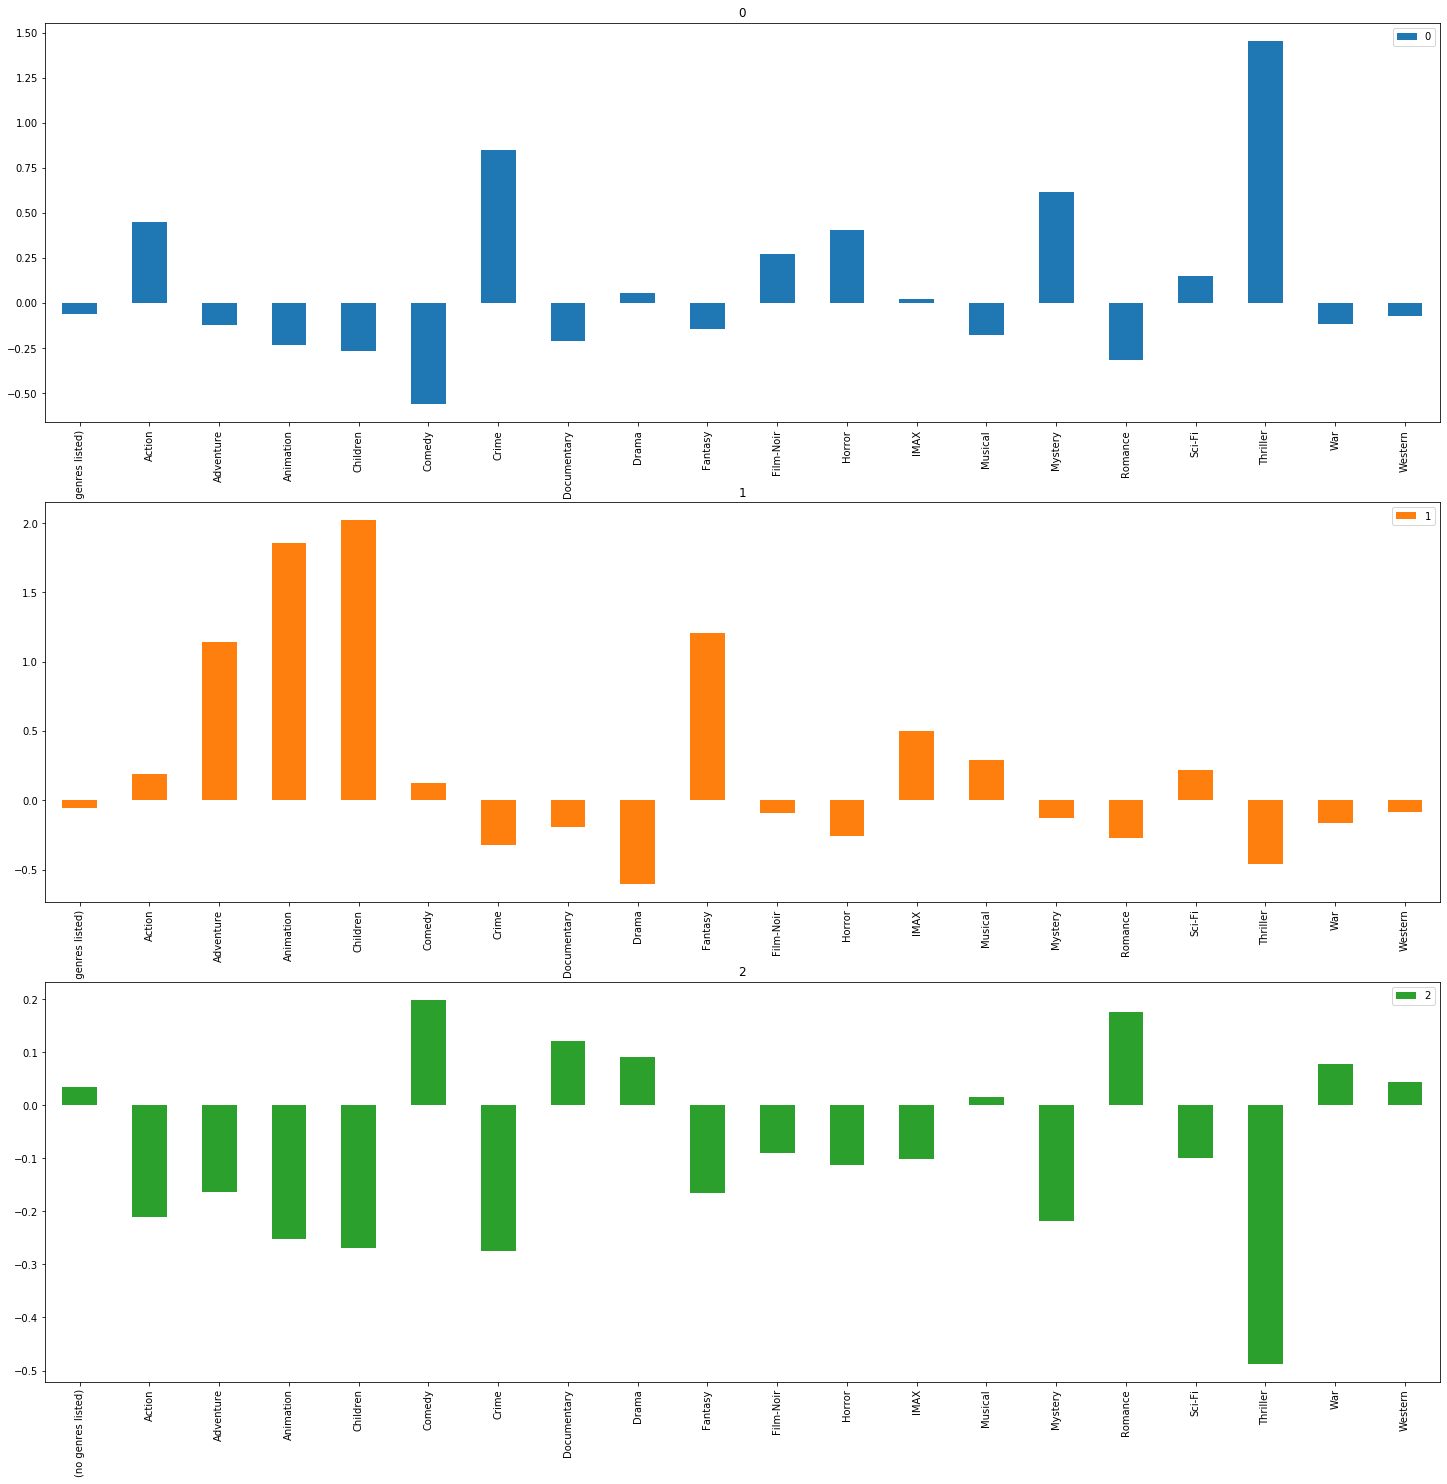

In [8]:
# Plotando em grafico, invertendo o x pelo y (transpose) e não compartilhando a legenda x

grupos.transpose().plot.bar(subplots=True,
                            figsize=(25,25),
                            sharex=False)

In [9]:
# Criando um filtro, aplicando na base de dados e pedindo para exibir apenas 2 do grupo 0 (Animação)

grupo = 0

filtro0 = modelo.labels_ == grupo
dados_dos_filmes[filtro0].sample(2)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
43,47,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4118,5903,Equilibrium (2002),Action|Sci-Fi|Thriller,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0


In [10]:
# Colocando os dados em grafico reduzindo de 20 para 2 dimensoes

from sklearn.manifold import TSNE

tsne = TSNE()
visualizacao = tsne.fit_transform(generos_escalados)
visualizacao

array([[ 32.55893 ,  57.457706],
       [-56.18538 ,  50.129536],
       [ 13.776886, -29.871336],
       ...,
       [-10.117896, -10.85039 ],
       [ 17.93256 ,   9.886211],
       [ -8.010291,  24.969913]], dtype=float32)

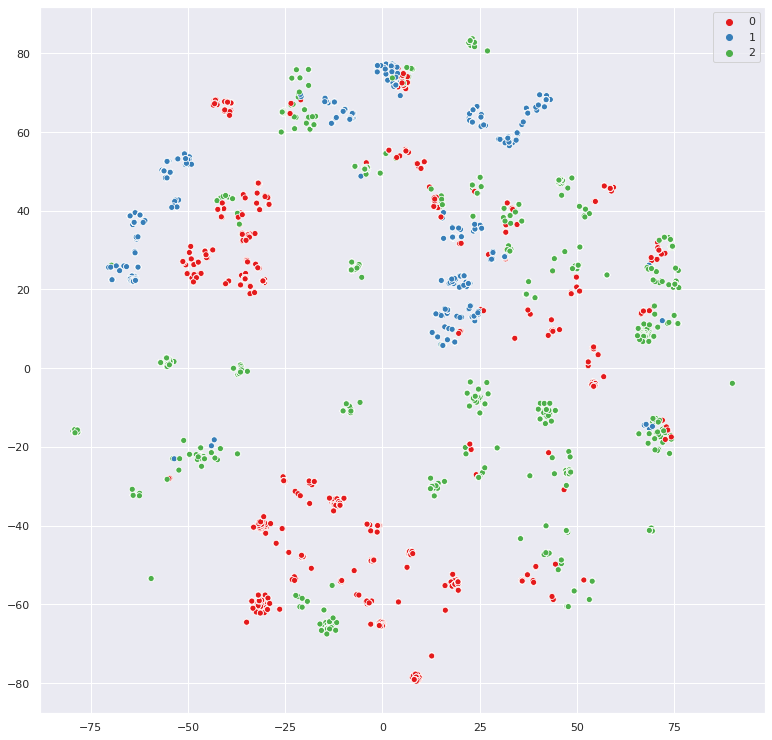

In [11]:
# Plotando usando o Seaborn, alterando o tamanho de exibicao, inserindo cores de acordo com os grupos e alterando a palheta destas 3 cores para uma mais chamativa

import seaborn as sns

sns.set(rc={'figure.figsize': (13, 13)})

sns.scatterplot(x=visualizacao[:, 0],
                y=visualizacao[:, 1],
                hue=modelo.labels_,
                palette=sns.color_palette('Set1', 3))

In [12]:
# Dividindo em 20 grupo ao inves de 2

modelo = KMeans(n_clusters=20)
modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelo.cluster_centers_,
                      columns=generos.columns)
grupos

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,-0.059180,-0.440941,-0.241052,-0.203930,-0.270451,-0.792126,-0.253414,-0.217489,0.950634,-0.294810,-0.094926,-0.326693,-0.128397,-0.188419,-0.249986,2.259206,-0.246172,-0.396223,-0.202020,-0.132065
1,-0.059180,-0.250165,-0.282765,-0.258679,-0.270451,-0.792126,-0.060362,-0.217489,1.021822,-0.294810,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,-0.442633,-0.334435,-0.491259,-0.202020,-0.132065
2,-0.059180,-0.333405,-0.317512,-0.163864,-0.270451,-0.744895,1.444723,-0.217489,0.255531,-0.252433,10.534563,-0.257559,-0.128397,-0.188419,0.922484,-0.194188,-0.219795,0.699553,-0.202020,-0.043513
3,-0.059180,1.638891,-0.163890,-0.181766,-0.270451,-0.236583,2.669289,-0.217489,-0.229896,-0.269028,-0.094926,-0.256489,-0.128397,-0.188419,-0.249986,-0.360760,-0.241440,0.987152,-0.202020,-0.132065
4,-0.059180,0.140808,0.888998,3.865793,1.596339,0.157128,-0.297570,-0.217489,-0.645683,0.731901,-0.094926,-0.256833,-0.128397,-0.188419,-0.178253,-0.311532,0.268754,-0.469935,-0.180281,-0.132065
5,-0.059180,-0.440080,-0.027959,0.563605,0.721543,0.248153,-0.297570,-0.034626,-0.181104,0.265214,-0.094926,-0.260343,-0.128397,5.307322,-0.182736,0.326878,-0.260790,-0.467270,-0.169412,-0.132065
6,-0.059180,-0.324411,-0.294295,-0.258679,-0.270451,1.262425,-0.122323,-0.217489,-0.313243,-0.294810,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,-0.442633,-0.334435,-0.465826,-0.202020,-0.132065
7,-0.059180,1.600457,2.591019,-0.246962,-0.259179,-0.406898,-0.365984,-0.217489,-0.477468,-0.294810,-0.094926,-0.286789,-0.128397,-0.188419,-0.237912,-0.235390,1.290063,0.305559,-0.202020,-0.132065
8,16.897616,-0.480607,-0.385949,-0.258679,-0.270451,-0.792126,-0.374632,-0.217489,-0.900247,-0.294810,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,-0.442633,-0.334435,-0.491259,-0.202020,-0.132065
9,-0.059180,1.026999,1.121377,0.628865,0.482962,-0.441032,-0.162713,0.026329,-0.492945,0.801904,-0.094926,-0.081328,7.788339,0.089846,-0.088586,-0.288731,0.970137,0.068485,-0.071589,-0.034545


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0645adad30>,
      dtype=object)

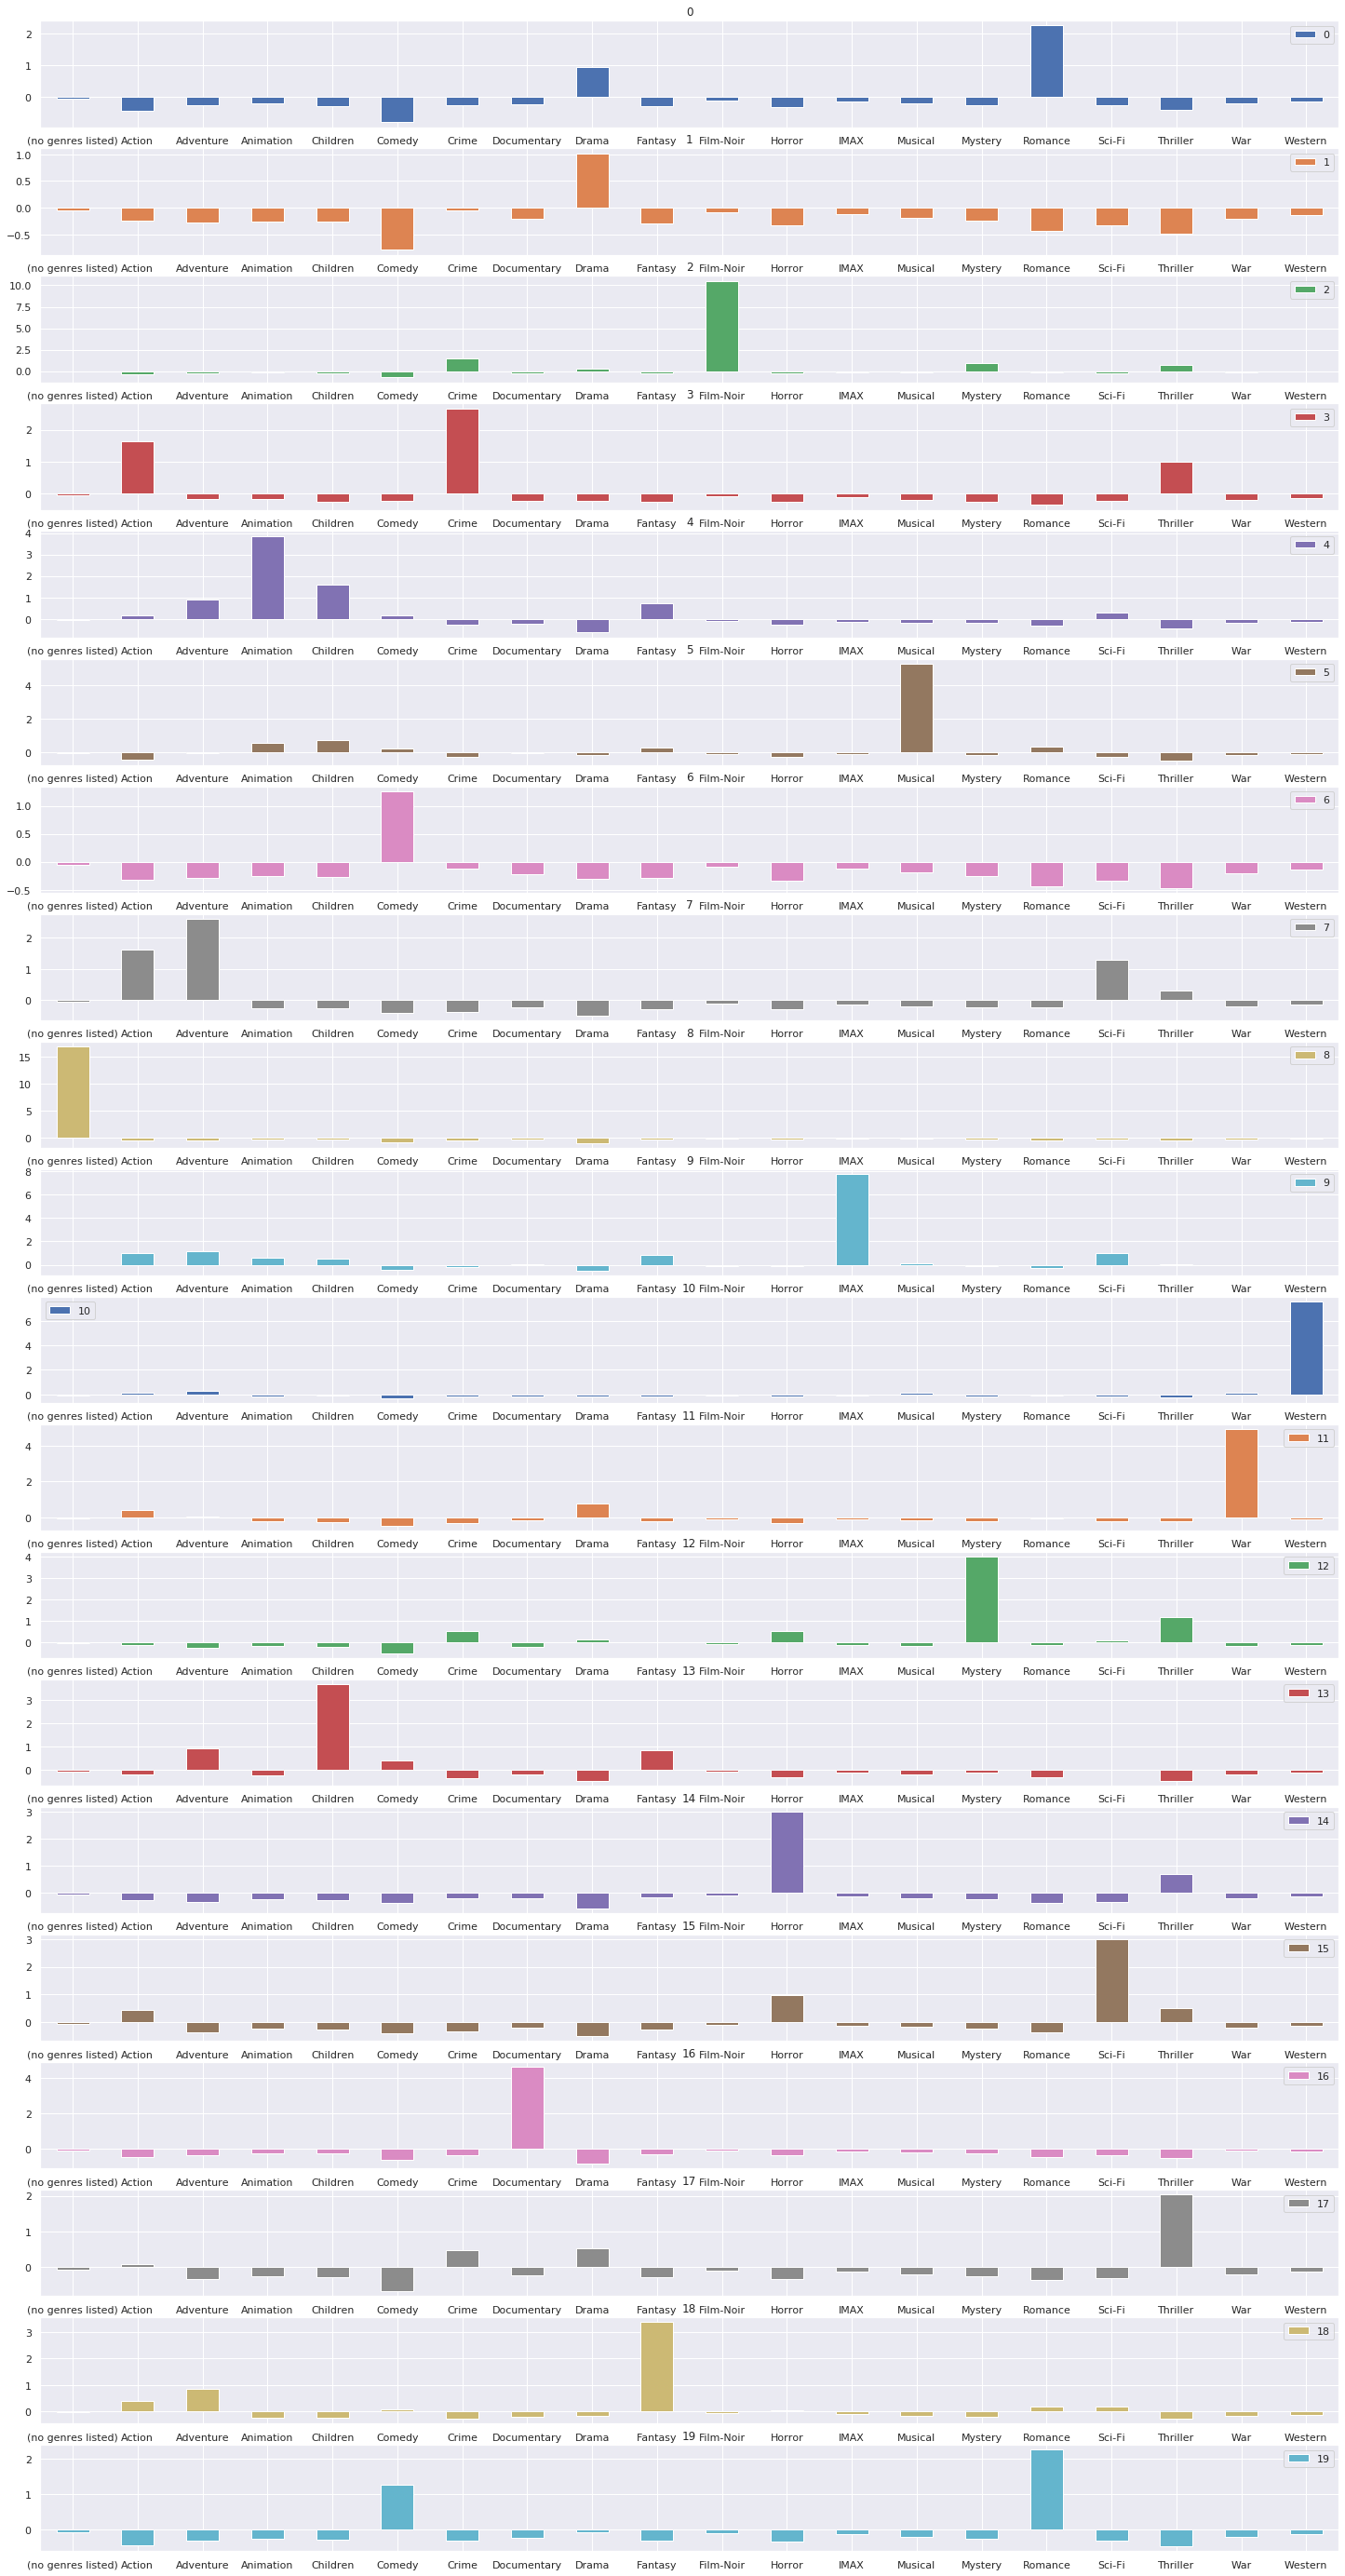

In [13]:
# Alterando linha para coluna e plotando

grupos.transpose().plot.bar(subplots=True,
                            figsize=(25,50),
                            sharex=False,
                            rot=0)

In [14]:
# Criando um filtro, aplicando na base de dados e pedindo para exibir apenas 2 do grupo 3 (Animação)

grupo = 2

filtro0 = modelo.labels_ == grupo
dados_dos_filmes[filtro0].sample(5)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1203,1601,Hoodlum (1997),Crime|Drama|Film-Noir,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0
5001,7728,"Postman Always Rings Twice, The (1946)",Crime|Drama|Film-Noir|Thriller,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0
5850,32587,Sin City (2005),Action|Crime|Film-Noir|Mystery|Thriller,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0
5293,8765,This Gun for Hire (1942),Crime|Film-Noir|Thriller,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
947,1248,Touch of Evil (1958),Crime|Film-Noir|Thriller,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0


In [0]:
# Definindo função para saber o erro do modelo de separação de grupos

def kmeans(numero_clusters, generos):
  modelo = KMeans(n_clusters=numero_clusters)
  modelo.fit(generos)
  return [numero_clusters, modelo.inertia_]

In [16]:
# Testando erro com 20 grupos

kmeans(20, generos_escalados)

[20, 54859.999091625694]

In [17]:
# Testando erro com 3 grupos

kmeans(3, generos_escalados)

[3, 166153.1315938706]

In [18]:
# Fazendo um for para testar grupos de 1 a 50 elementos em nossa função

resultado = [kmeans(numero_de_grupos, generos_escalados) for numero_de_grupos in range(1, 41)]
resultado

[[1, 194840.0],
 [2, 179664.9990790031],
 [3, 166144.45256702747],
 [4, 157305.45447814435],
 [5, 146938.45591987457],
 [6, 138874.73957895918],
 [7, 128872.36642712243],
 [8, 120404.97513860566],
 [9, 111182.9580668979],
 [10, 102660.55948354964],
 [11, 94689.95203051488],
 [12, 85198.95447322115],
 [13, 80565.53124244155],
 [14, 73274.51331998347],
 [15, 69303.09576078349],
 [16, 63805.108504564334],
 [17, 60840.27703507254],
 [18, 58364.575189231946],
 [19, 56522.5800684153],
 [20, 55295.80896778464],
 [21, 53227.332256015165],
 [22, 52841.46820516623],
 [23, 50781.9072792632],
 [24, 48646.977683141755],
 [25, 47928.36029241077],
 [26, 46768.60619231164],
 [27, 45711.37719535626],
 [28, 45071.561548001984],
 [29, 42800.168004198924],
 [30, 42693.17943519649],
 [31, 42103.381230344174],
 [32, 40269.930377199154],
 [33, 39742.39097115966],
 [34, 39923.245461774306],
 [35, 38434.52820294866],
 [36, 37936.83149491641],
 [37, 37365.450525177584],
 [38, 36775.69675995202],
 [39, 36283.130

In [19]:
# Passando lista para um DataFrame

resultado = pd.DataFrame(resultado,
                         columns=['grupos','inertia'])
resultado

,grupos,inertia
0,1,194840.000000
1,2,179664.999079
2,3,166144.452567
3,4,157305.454478
4,5,146938.455920
5,6,138874.739579
6,7,128872.366427
7,8,120404.975139
8,9,111182.958067
9,10,102660.559484


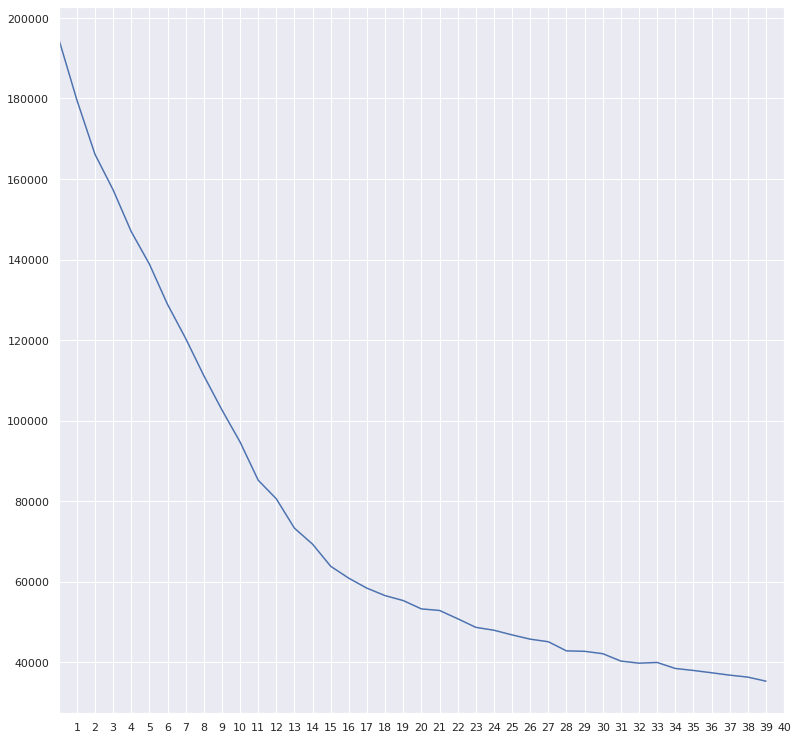

In [20]:
# Plotando a inertia e colocando como ticks do eixo x os grupos

resultado.inertia.plot(xticks=resultado.grupos)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0644d11c88>,
      dtype=object)

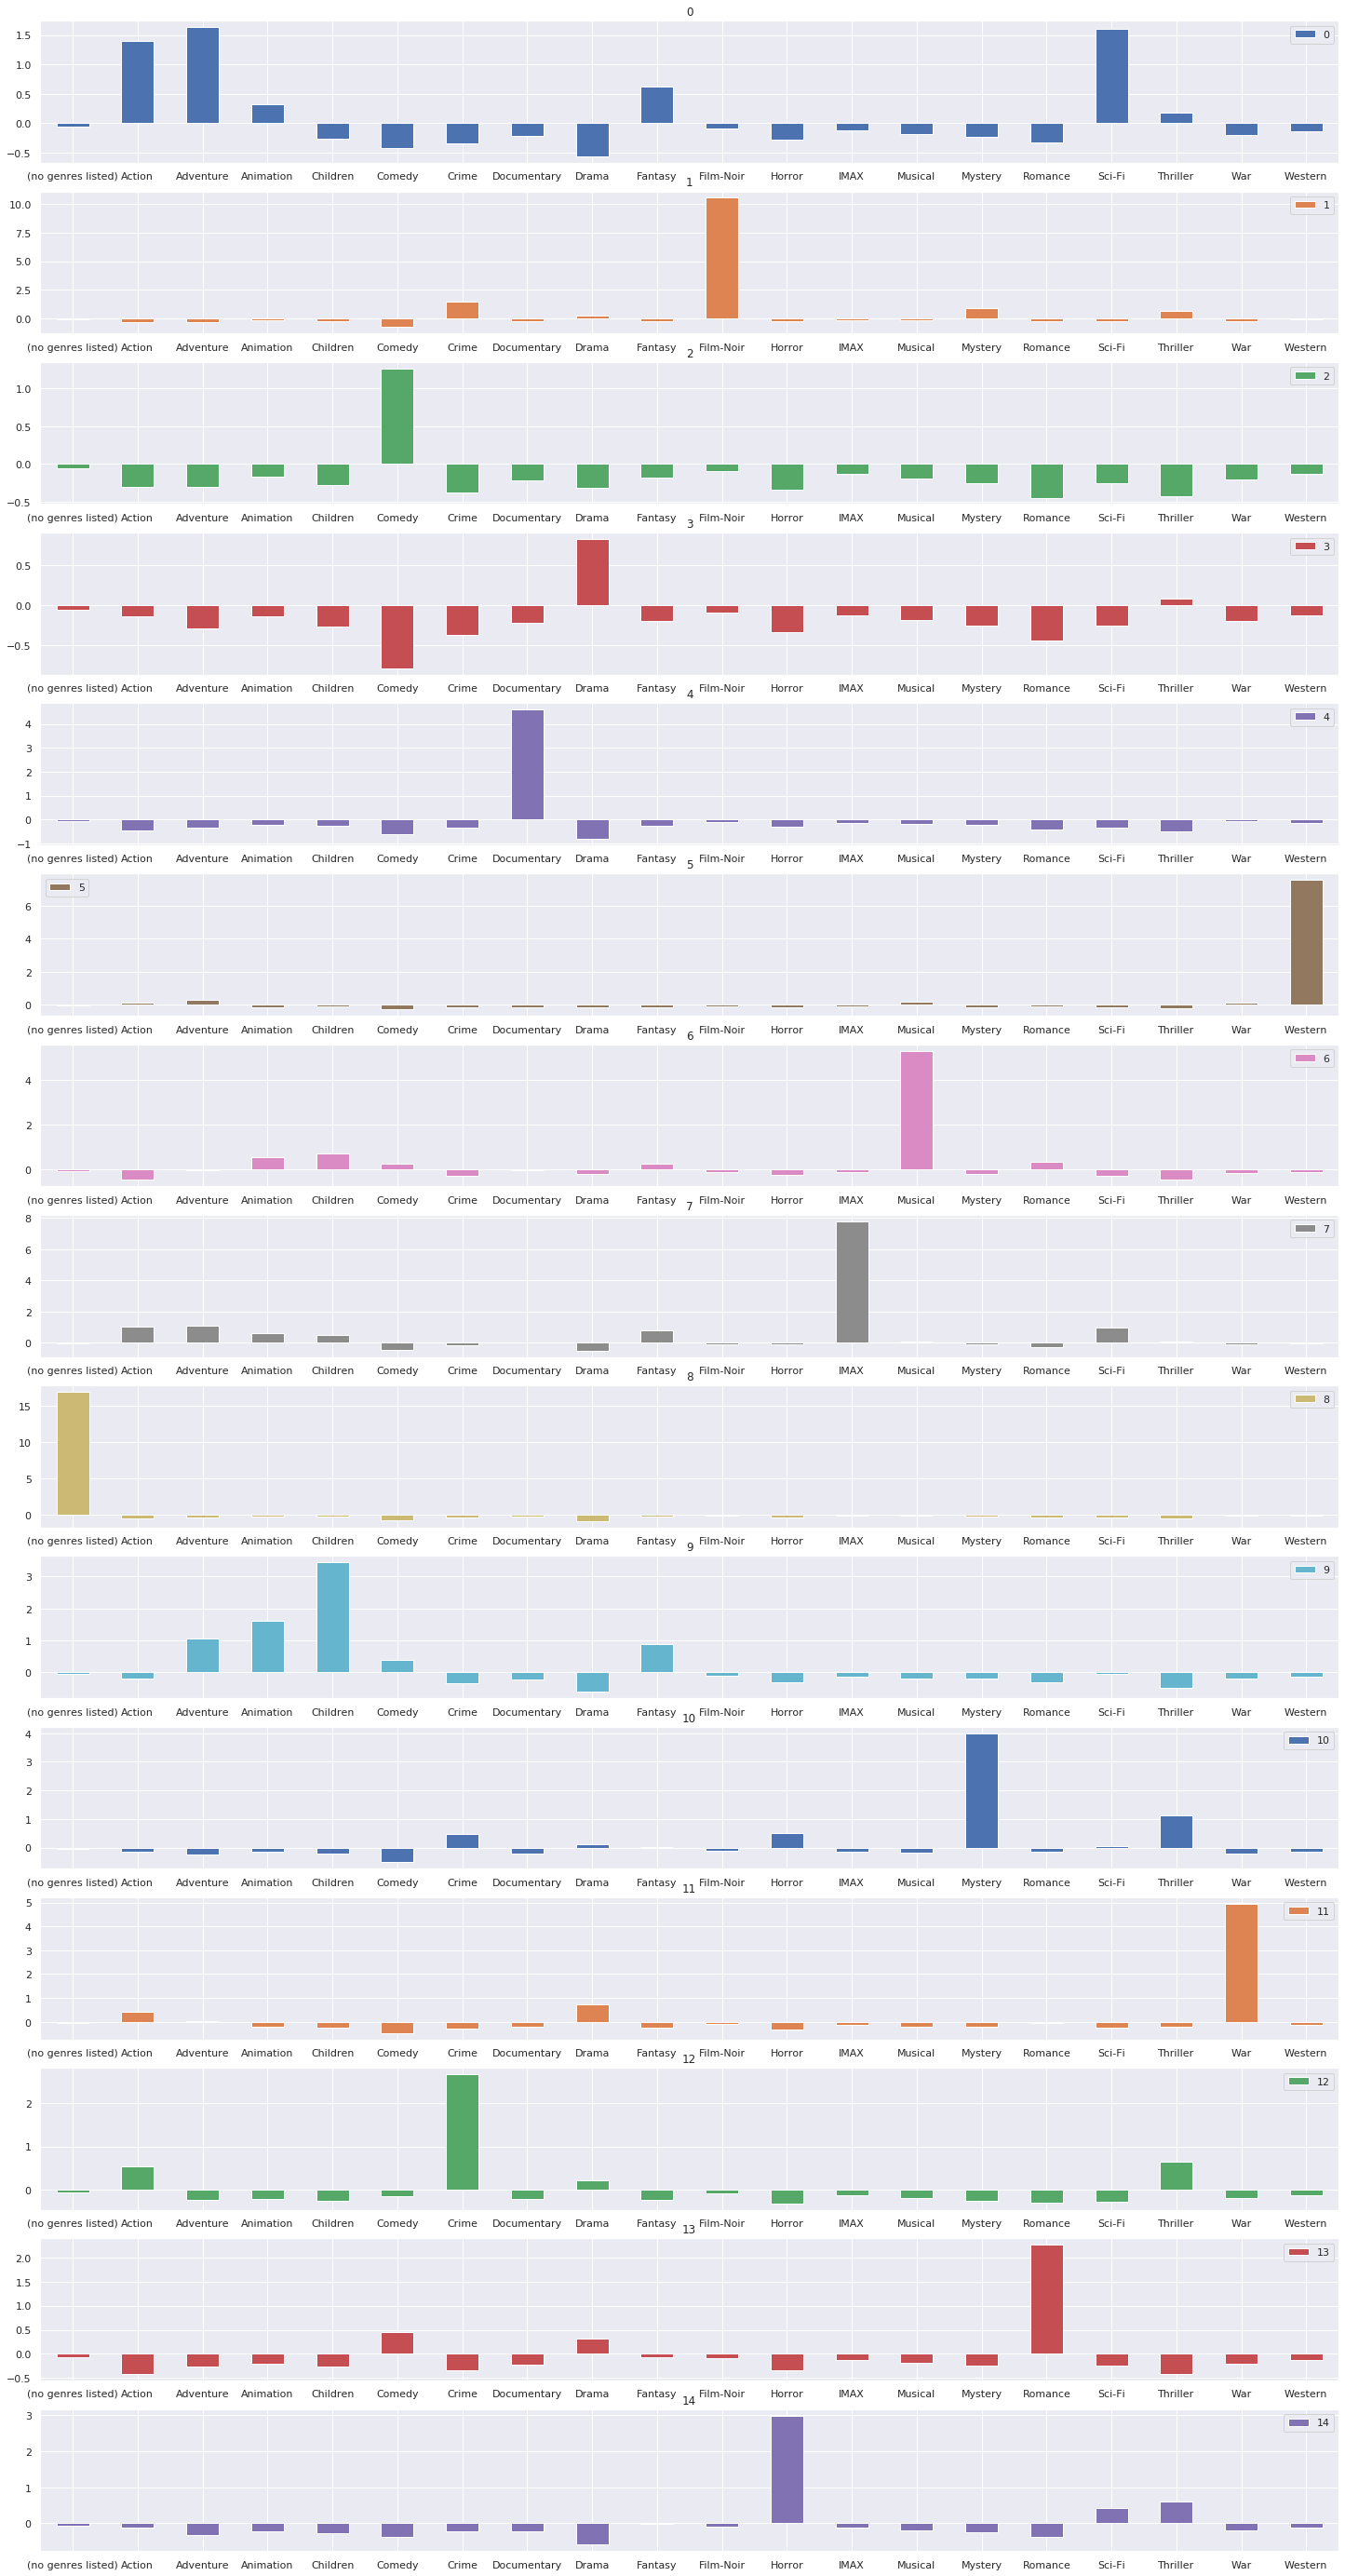

In [21]:
# Utilizamos o método do cotovelo para analisar em qual parte do gráfico há uma pequena diferênça e utilizamos esse valor para treinar nosso modelo 

modelo = KMeans(n_clusters=15)
modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelo.cluster_centers_,
                      columns=generos.columns)

grupos.transpose().plot.bar(subplots=True,
                            figsize=(25,50),
                            sharex=False,
                            rot=0)

In [22]:
grupo = 0

filtro0 = modelo.labels_ == grupo
dados_dos_filmes[filtro0].sample(5)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
4334,6333,X2: X-Men United (2003),Action|Adventure|Sci-Fi|Thriller,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
9437,166635,Passengers (2016),Adventure|Drama|Romance|Sci-Fi,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0
1373,1882,Godzilla (1998),Action|Sci-Fi|Thriller,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
4966,7570,Octopussy (1983),Action|Adventure|Thriller,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
8904,135133,The Hunger Games: Mockingjay - Part 2 (2015),Adventure|Sci-Fi,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
